In [24]:
import numpy as np
from keras.utils.np_utils import to_categorical
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from keras import regularizers
from keras.layers import Dropout

In [18]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
X_test=np.load("/content/drive/My Drive/New_version_copd/vb_raw_data.npy")
m1=np.load("/content/drive/My Drive/New_version_copd/md1_raw_data.npy")
m2=np.load("/content/drive/My Drive/New_version_copd/md2_raw_data.npy")
m3=np.load("/content/drive/My Drive/New_version_copd/cp_raw_data.npy")
X_train=np.vstack((m1,m2,m3))

In [22]:
y_train=X_train[:,-1]
X_train=X_train[:,:-1]
y_test=X_test[:,-1]
X_test=X_test[:,:-1]

In [25]:
X_train = np.reshape(X_train, (X_train.shape[0], 600,120))
X_test = np.reshape(X_test, (X_test.shape[0], 600,120))
X_test_list=[]
y_test_list=[]
test_loss=[]
train_loss=[]
test_acc=[]
train_acc=[]
test_auc=[]
train_auc=[]
#X_train=pd.DataFrame(data=X_train)
#y_train=pd.DataFrame(data=y_train)
#y_test=pd.DataFrame(data=y_test)
#X_test=pd.DataFrame(data=X_test)  
one_hot_train_labels = to_categorical(y_train)
one_hot_test_labels = to_categorical(y_test)
X_test_list.append(X_test)
y_test_list.append(one_hot_test_labels)


model = models.Sequential()
# model.add(layers.Dense(300, activation='relu', input_shape=(72000,)))
# #model.add(Dropout(0.2))
# model.add(layers.Dense(100, activation='relu'))
# #model.add(Dropout(0.2))
# model.add(layers.Dense(5, activation='softmax'))
model.add(layers.InputLayer(input_shape=(600,120)))
# model.add(layers.LSTM(100,activation='relu',return_sequences = True,input_shape = (600,120),recurrent_initializer='glorot_uniform',))
model.add(layers.LSTM(300))
model.add(Dropout(0.2))
model.add(layers.Dense(100,activation='relu'))
model.add(Dropout(0.2))
# model.add(layers.Flatten())
model.add(layers.Dense(5, activation='softmax'))



model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy', 'AUC'])
history = model.fit(X_train, one_hot_train_labels, epochs=500, batch_size=64, validation_data=(X_test, one_hot_test_labels))
loss = history.history['loss']
val_loss = history.history['val_loss']
train_loss.append(loss)
test_loss.append(val_loss)
train_acc_1=history.history['accuracy']
val_acc = history.history['val_accuracy']
test_acc.append(val_acc)
train_acc.append(train_acc_1)
a=history.history['auc']
b=history.history['val_auc']
test_auc.append(b)
train_auc.append(a)
np.save('/content/drive/MyDrive/New_version_copd/train_loss_vb_lstm',train_loss)
np.save('/content/drive/MyDrive/New_version_copd/test_loss_vb_lstm',test_loss)
np.save('/content/drive/MyDrive/New_version_copd/train_acc_vb_lstm',train_acc)
np.save('/content/drive/MyDrive/New_version_copd/test_acc_vb_lstm',test_acc)
np.save('/content/drive/MyDrive/New_version_copd/train_auc_vb_lstm',train_auc)
np.save('/content/drive/MyDrive/New_version_copd/test_auc_vb_lstm',test_auc)

Epoch 1/500
52/52 [==============================] - 87s 2s/step - loss: 1.4585 - accuracy: 0.3957 - auc: 0.6874 - val_loss: 0.9095 - val_accuracy: 0.7067 - val_auc: 0.9246
Epoch 2/500
52/52 [==============================] - 83s 2s/step - loss: 0.9754 - accuracy: 0.6157 - auc: 0.8814 - val_loss: 0.9922 - val_accuracy: 0.6200 - val_auc: 0.8850
Epoch 3/500
52/52 [==============================] - 84s 2s/step - loss: 0.8410 - accuracy: 0.6588 - auc: 0.9111 - val_loss: 0.8691 - val_accuracy: 0.6200 - val_auc: 0.9060
Epoch 4/500
52/52 [==============================] - 84s 2s/step - loss: 0.8055 - accuracy: 0.6698 - auc: 0.9172 - val_loss: 0.5308 - val_accuracy: 0.7274 - val_auc: 0.9592
Epoch 5/500
41/52 [======================>.......] - ETA: 15s - loss: 0.6542 - accuracy: 0.7077 - auc: 0.9439

KeyboardInterrupt: ignored

In [16]:
X_test=np.load("/content/drive/My Drive/New_version_copd/md1_raw_data.npy")
m1=np.load("/content/drive/My Drive/New_version_copd/vb_raw_data.npy")
m2=np.load("/content/drive/My Drive/New_version_copd/md2_raw_data.npy")
m3=np.load("/content/drive/My Drive/New_version_copd/cp_raw_data.npy")
X_train=np.vstack((m1,m2,m3))
y_train=X_train[:,-1]
X_train=X_train[:,:-1]
y_test=X_test[:,-1]
X_test=X_test[:,:-1]

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], 600,120))
X_test = np.reshape(X_test, (X_test.shape[0], 600,120))
X_test_list=[]
y_test_list=[]
test_loss=[]
train_loss=[]
test_acc=[]
train_acc=[]
test_auc=[]
train_auc=[]
#X_train=pd.DataFrame(data=X_train)
#y_train=pd.DataFrame(data=y_train)
#y_test=pd.DataFrame(data=y_test)
#X_test=pd.DataFrame(data=X_test)  
one_hot_train_labels = to_categorical(y_train)
one_hot_test_labels = to_categorical(y_test)
X_test_list.append(X_test)
y_test_list.append(one_hot_test_labels)


model = models.Sequential()
# model.add(layers.Dense(300, activation='relu', input_shape=(72000,)))
# #model.add(Dropout(0.2))
# model.add(layers.Dense(100, activation='relu'))
# #model.add(Dropout(0.2))
# model.add(layers.Dense(5, activation='softmax'))
model.add(layers.InputLayer(input_shape=(600,120)))
# model.add(layers.LSTM(100,activation='relu',return_sequences = True,input_shape = (600,120),recurrent_initializer='glorot_uniform',))
model.add(layers.LSTM(150))
model.add(Dropout(0.2))
model.add(layers.Dense(100,activation='relu'))
model.add(Dropout(0.2))
# model.add(layers.Flatten())
model.add(layers.Dense(5, activation='softmax'))



model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy', 'AUC'])
history = model.fit(X_train, one_hot_train_labels, epochs=500, batch_size=64, validation_data=(X_test, one_hot_test_labels))
loss = history.history['loss']
val_loss = history.history['val_loss']
train_loss.append(loss)
test_loss.append(val_loss)
train_acc_1=history.history['accuracy']
val_acc = history.history['val_accuracy']
test_acc.append(val_acc)
train_acc.append(train_acc_1)
a=history.history['auc']
b=history.history['val_auc']
test_auc.append(b)
train_auc.append(a)
np.save('/content/drive/MyDrive/New_version_copd/train_loss_md1_lstm',train_loss)
np.save('/content/drive/MyDrive/New_version_copd/test_loss_md1_lstm',test_loss)
np.save('/content/drive/MyDrive/New_version_copd/train_acc_md1_lstm',train_acc)
np.save('/content/drive/MyDrive/New_version_copd/test_acc_md1_lstm',test_acc)
np.save('/content/drive/MyDrive/New_version_copd/train_auc_md1_lstm',train_auc)
np.save('/content/drive/MyDrive/New_version_copd/test_auc_md1_lstm',test_auc)

In [ ]:
X_test=np.load("/content/drive/My Drive/New_version_copd/md2_raw_data.npy")
m1=np.load("/content/drive/My Drive/New_version_copd/vb_raw_data.npy")
m2=np.load("/content/drive/My Drive/New_version_copd/md1_raw_data.npy")
m3=np.load("/content/drive/My Drive/New_version_copd/cp_raw_data.npy")
X_train=np.vstack((m1,m2,m3))
y_train=X_train[:,-1]
X_train=X_train[:,:-1]
y_test=X_test[:,-1]
X_test=X_test[:,:-1]

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], 600,120))
X_test = np.reshape(X_test, (X_test.shape[0], 600,120))
X_test_list=[]
y_test_list=[]
test_loss=[]
train_loss=[]
test_acc=[]
train_acc=[]
test_auc=[]
train_auc=[]
#X_train=pd.DataFrame(data=X_train)
#y_train=pd.DataFrame(data=y_train)
#y_test=pd.DataFrame(data=y_test)
#X_test=pd.DataFrame(data=X_test)  
one_hot_train_labels = to_categorical(y_train)
one_hot_test_labels = to_categorical(y_test)
X_test_list.append(X_test)
y_test_list.append(one_hot_test_labels)


model = models.Sequential()
# model.add(layers.Dense(300, activation='relu', input_shape=(72000,)))
# #model.add(Dropout(0.2))
# model.add(layers.Dense(100, activation='relu'))
# #model.add(Dropout(0.2))
# model.add(layers.Dense(5, activation='softmax'))
model.add(layers.InputLayer(input_shape=(600,120)))
# model.add(layers.LSTM(100,activation='relu',return_sequences = True,input_shape = (600,120),recurrent_initializer='glorot_uniform',))
model.add(layers.LSTM(150))
model.add(Dropout(0.2))
model.add(layers.Dense(100,activation='relu'))
model.add(Dropout(0.2))
# model.add(layers.Flatten())
model.add(layers.Dense(5, activation='softmax'))



model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy', 'AUC'])
history = model.fit(X_train, one_hot_train_labels, epochs=500, batch_size=64, validation_data=(X_test, one_hot_test_labels))
loss = history.history['loss']
val_loss = history.history['val_loss']
train_loss.append(loss)
test_loss.append(val_loss)
train_acc_1=history.history['accuracy']
val_acc = history.history['val_accuracy']
test_acc.append(val_acc)
train_acc.append(train_acc_1)
a=history.history['auc']
b=history.history['val_auc']
test_auc.append(b)
train_auc.append(a)
np.save('/content/drive/MyDrive/New_version_copd/train_loss_md2_lstm',train_loss)
np.save('/content/drive/MyDrive/New_version_copd/test_loss_md2_lstm',test_loss)
np.save('/content/drive/MyDrive/New_version_copd/train_acc_md2_lstm',train_acc)
np.save('/content/drive/MyDrive/New_version_copd/test_acc_md2_lstm',test_acc)
np.save('/content/drive/MyDrive/New_version_copd/train_auc_md2_lstm',train_auc)
np.save('/content/drive/MyDrive/New_version_copd/test_auc_md2_lstm',test_auc)

In [ ]:
X_test=np.load("/content/drive/My Drive/New_version_copd/cp_raw_data.npy")
m1=np.load("/content/drive/My Drive/New_version_copd/vb_raw_data.npy")
m2=np.load("/content/drive/My Drive/New_version_copd/md1_raw_data.npy")
m3=np.load("/content/drive/My Drive/New_version_copd/md2_raw_data.npy")
X_train=np.vstack((m1,m2,m3))
y_train=X_train[:,-1]
X_train=X_train[:,:-1]
y_test=X_test[:,-1]
X_test=X_test[:,:-1]

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], 600,120))
X_test = np.reshape(X_test, (X_test.shape[0], 600,120))
X_test_list=[]
y_test_list=[]
test_loss=[]
train_loss=[]
test_acc=[]
train_acc=[]
test_auc=[]
train_auc=[]
#X_train=pd.DataFrame(data=X_train)
#y_train=pd.DataFrame(data=y_train)
#y_test=pd.DataFrame(data=y_test)
#X_test=pd.DataFrame(data=X_test)  
one_hot_train_labels = to_categorical(y_train)
one_hot_test_labels = to_categorical(y_test)
X_test_list.append(X_test)
y_test_list.append(one_hot_test_labels)


model = models.Sequential()
# model.add(layers.Dense(300, activation='relu', input_shape=(72000,)))
# #model.add(Dropout(0.2))
# model.add(layers.Dense(100, activation='relu'))
# #model.add(Dropout(0.2))
# model.add(layers.Dense(5, activation='softmax'))
model.add(layers.InputLayer(input_shape=(600,120)))
# model.add(layers.LSTM(100,activation='relu',return_sequences = True,input_shape = (600,120),recurrent_initializer='glorot_uniform',))
model.add(layers.LSTM(150))
model.add(Dropout(0.2))
model.add(layers.Dense(100,activation='relu'))
model.add(Dropout(0.2))
# model.add(layers.Flatten())
model.add(layers.Dense(5, activation='softmax'))



model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy', 'AUC'])
history = model.fit(X_train, one_hot_train_labels, epochs=500, batch_size=64, validation_data=(X_test, one_hot_test_labels))
loss = history.history['loss']
val_loss = history.history['val_loss']
train_loss.append(loss)
test_loss.append(val_loss)
train_acc_1=history.history['accuracy']
val_acc = history.history['val_accuracy']
test_acc.append(val_acc)
train_acc.append(train_acc_1)
a=history.history['auc']
b=history.history['val_auc']
test_auc.append(b)
train_auc.append(a)
np.save('/content/drive/MyDrive/New_version_copd/train_loss_cp_lstm',train_loss)
np.save('/content/drive/MyDrive/New_version_copd/test_loss_cp_lstm',test_loss)
np.save('/content/drive/MyDrive/New_version_copd/train_acc_cp_lstm',train_acc)
np.save('/content/drive/MyDrive/New_version_copd/test_acc_cp_lstm',test_acc)
np.save('/content/drive/MyDrive/New_version_copd/train_auc_cp_lstm',train_auc)
np.save('/content/drive/MyDrive/New_version_copd/test_auc_cp_lstm',test_auc)

In [33]:
train_loss=np.load('/content/drive/MyDrive/New_version_copd/train_loss_vb_lstm.npy')
test_loss=np.load('/content/drive/MyDrive/New_version_copd/test_loss_vb_lstm.npy')
train_acc=np.load('/content/drive/MyDrive/New_version_copd/train_acc_vb_lstm.npy')
test_acc=np.load('/content/drive/MyDrive/New_version_copd/test_acc_vb_lstm.npy')
train_auc=np.load('/content/drive/MyDrive/New_version_copd/train_auc_vb_lstm.npy')
test_auc=np.load('/content/drive/MyDrive/New_version_copd/test_auc_vb_lstm.npy')

train_loss=np.vstack((train_loss,np.load('/content/drive/MyDrive/New_version_copd/train_loss_mb1_lstm.npy')))
test_loss=np.vstack((test_loss,np.load('/content/drive/MyDrive/New_version_copd/test_loss_mb1_lstm.npy')))
train_acc=np.vstack((train_acc,np.load('/content/drive/MyDrive/New_version_copd/train_acc_mb1_lstm.npy')))
test_acc=np.vstack((test_acc,np.load('/content/drive/MyDrive/New_version_copd/test_acc_mb1_lstm.npy')))
train_auc=np.vstack((train_auc,np.load('/content/drive/MyDrive/New_version_copd/train_auc_mb1_lstm.npy')))
test_auc=np.vstack((test_auc,np.load('/content/drive/MyDrive/New_version_copd/test_auc_mb1_lstm.npy')))

train_loss=np.vstack((train_loss,np.load('/content/drive/MyDrive/New_version_copd/train_loss_mb2_lstm.npy')))
test_loss=np.vstack((test_loss,np.load('/content/drive/MyDrive/New_version_copd/test_loss_mb2_lstm.npy')))
train_acc=np.vstack((train_acc,np.load('/content/drive/MyDrive/New_version_copd/train_acc_mb2_lstm.npy')))
test_acc=np.vstack((test_acc,np.load('/content/drive/MyDrive/New_version_copd/test_acc_mb2_lstm.npy')))
train_auc=np.vstack((train_auc,np.load('/content/drive/MyDrive/New_version_copd/train_auc_mb2_lstm.npy')))
test_auc=np.vstack((test_auc,np.load('/content/drive/MyDrive/New_version_copd/test_auc_mb2_lstm.npy')))


train_loss=np.vstack((train_loss,np.load('/content/drive/MyDrive/New_version_copd/train_loss_cp_lstm.npy')))
test_loss=np.vstack((test_loss,np.load('/content/drive/MyDrive/New_version_copd/test_loss_cp_lstm.npy')))
train_acc=np.vstack((train_acc,np.load('/content/drive/MyDrive/New_version_copd/train_acc_cp_lstm.npy')))
test_acc=np.vstack((test_acc,np.load('/content/drive/MyDrive/New_version_copd/test_acc_cp_lstm.npy')))
train_auc=np.vstack((train_auc,np.load('/content/drive/MyDrive/New_version_copd/train_auc_cp_lstm.npy')))
test_auc=np.vstack((test_auc,np.load('/content/drive/MyDrive/New_version_copd/test_auc_cp_lstm.npy')))


In [34]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

0.020057854467433658 0.9664321392774582


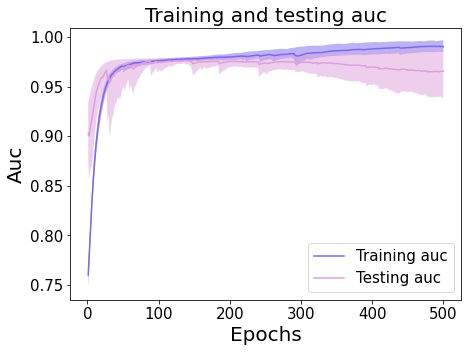

In [35]:
epochs = range(1, 500 + 1)
train_auc_min=[]
train_auc_max=[]
train_auc_mean=[]
for i in range(0, 500):
    maxv=max(train_auc[0][i],train_auc[1][i],train_auc[2][i],train_auc[3][i])
    minv=min(train_auc[0][i],train_auc[1][i],train_auc[2][i],train_auc[3][i])
    meanv=(train_auc[0][i]+train_auc[1][i]+train_auc[2][i]+train_auc[3][i]) /4
    train_auc_min.append(minv)
    train_auc_max.append(maxv)
    train_auc_mean.append(meanv)
test_auc_min=[]
test_auc_max=[]
test_auc_mean=[]
for i in range(0, 500):
    maxv=max(test_auc[0][i],test_auc[1][i],test_auc[2][i],test_auc[3][i])
    minv=min(test_auc[0][i],test_auc[1][i],test_auc[2][i],test_auc[3][i])
    meanv=(test_auc[0][i]+test_auc[1][i]+test_auc[2][i]+test_auc[3][i]) /4
    test_auc_min.append(minv)
    test_auc_max.append(maxv)
    test_auc_mean.append(meanv)

i=499
w = np.array([test_auc[0][i],test_auc[1][i],test_auc[2][i],test_auc[3][i]])
s=np.std(w)
meanv=np.mean(w)
print(s, meanv)

f=plt.figure(figsize=[7,5])
plt.plot(epochs, smooth_curve(train_auc_mean), 'k', color='mediumslateblue',label='Training auc')
plt.fill_between(epochs, smooth_curve(train_auc_min), smooth_curve(train_auc_max),alpha=0.5, facecolor='mediumslateblue')
plt.plot(epochs, smooth_curve(test_auc_mean), 'k', color='plum',label='Testing auc')
plt.fill_between(epochs, smooth_curve(test_auc_min), smooth_curve(test_auc_max),alpha=0.5, facecolor='plum')
plt.title('Training and testing auc',fontsize=20)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Auc',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.legend(["train","test"],loc="upper left")
plt.legend(loc = 4,fontsize=15)
#plt.savefig('/content/drive/My Drive/Colab Notebooks/ML/Trainingauc.png', dpi=600)
plt.show()

0.03457001681274482 0.8082739561796188


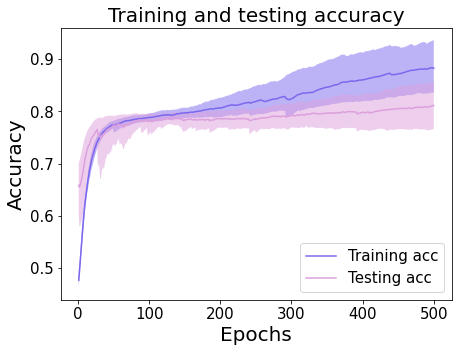

In [36]:
train_acc_min=[]
train_acc_max=[]
train_acc_mean=[]
for i in range(0, 500):
    maxv=max(train_acc[0][i],train_acc[1][i],train_acc[2][i],train_acc[3][i])
    minv=min(train_acc[0][i],train_acc[1][i],train_acc[2][i],train_acc[3][i])
    meanv=(train_acc[0][i]+train_acc[1][i]+train_acc[2][i]+train_acc[3][i]) /4
    train_acc_min.append(minv)
    train_acc_max.append(maxv)
    train_acc_mean.append(meanv)

test_acc_min=[]
test_acc_max=[]
test_acc_mean=[]
for i in range(0, 500):
    maxv=max(test_acc[0][i],test_acc[1][i],test_acc[2][i],test_acc[3][i])
    minv=min(test_acc[0][i],test_acc[1][i],test_acc[2][i],test_acc[3][i])
    meanv=(test_acc[0][i]+test_acc[1][i]+test_acc[2][i]+test_acc[3][i]) /4
    test_acc_min.append(minv)
    test_acc_max.append(maxv)
    test_acc_mean.append(meanv)
i=499
w = np.array([test_acc[0][i],test_acc[1][i],test_acc[2][i],test_acc[3][i]])
s=np.std(w)
meanv=np.mean(w)
print(s, meanv)
f=plt.figure(figsize=[7,5])
plt.plot(epochs, smooth_curve(train_acc_mean), 'k', color='mediumslateblue',label='Training acc')
plt.fill_between(epochs, smooth_curve(train_acc_min), smooth_curve(train_acc_max),alpha=0.5, facecolor='mediumslateblue')
plt.plot(epochs, smooth_curve(test_acc_mean), 'k', color='plum',label='Testing acc')
plt.fill_between(epochs, smooth_curve(test_acc_min), smooth_curve(test_acc_max),alpha=0.5, facecolor='plum')
plt.title('Training and testing accuracy',fontsize=20)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.legend(["train","test"],loc="upper left")
plt.legend(loc = 4,fontsize=15)
#plt.savefig('/content/drive/My Drive/Colab Notebooks/ML/Trainingacc7-5.png', dpi=600)
plt.show()


0.3572308437597675 0.6176919341087341


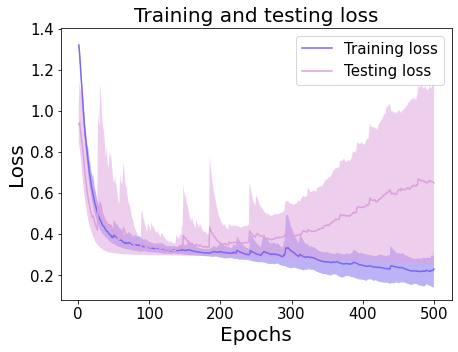

In [37]:
train_loss_min=[]
train_loss_max=[]
train_loss_mean=[]
for i in range(0, 500):
    maxv=max(train_loss[0][i],train_loss[1][i],train_loss[2][i],train_loss[3][i])
    minv=min(train_loss[0][i],train_loss[1][i],train_loss[2][i],train_loss[3][i])
    meanv=(train_loss[0][i]+train_loss[1][i]+train_loss[2][i]+train_loss[3][i]) /4
    train_loss_min.append(minv)
    train_loss_max.append(maxv)
    train_loss_mean.append(meanv)
test_loss_min=[]
test_loss_max=[]
test_loss_mean=[]
for i in range(0, 500):
    maxv=max(test_loss[0][i],test_loss[1][i],test_loss[2][i],test_loss[3][i])
    minv=min(test_loss[0][i],test_loss[1][i],test_loss[2][i],test_loss[3][i])
    meanv=(test_loss[0][i]+test_loss[1][i]+test_loss[2][i]+test_loss[3][i]) /4
    test_loss_min.append(minv)
    test_loss_max.append(maxv)
    test_loss_mean.append(meanv)

i=499
w = np.array([test_loss[0][i],test_loss[1][i],test_loss[2][i],test_loss[3][i]])
s=np.std(w)
meanv=np.mean(w)
print(s, meanv)

f=plt.figure(figsize=[7,5])
plt.plot(epochs, smooth_curve(train_loss_mean), 'k', color='mediumslateblue',label='Training loss')
plt.fill_between(epochs, smooth_curve(train_loss_min), smooth_curve(train_loss_max),alpha=0.5, facecolor='mediumslateblue')
plt.plot(epochs, smooth_curve(test_loss_mean), 'k', color='plum',label='Testing loss')
plt.fill_between(epochs, smooth_curve(test_loss_min), smooth_curve(test_loss_max),alpha=0.5, facecolor='plum')
plt.title('Training and testing loss',fontsize=20)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.legend(["train","test"],loc="upper left")
plt.legend(fontsize=15,loc="upper right")
#plt.savefig('/content/drive/My Drive/Colab Notebooks/ML/Trainingloss.png', dpi=600)
plt.show()

